In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import subprocess
import math
import pandas as pd

# Plotting 
import matplotlib.ticker as mtick
%matplotlib inline
import mpld3
mpld3.enable_notebook() # Disable this with: mpld3.disable_notebook() for better performance with histograms.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [17]:
Freq = np.arange(18,20.25,.25)
Freq_narrow = np.arange(18.75,19,.025)

Power_dBm_U = np.array([-52,-50,-47,-46,-52,-62,-54,-53,-50])
Power_dBm_I = np.array([-53,-49,-55,-65,-55,-75,-57,-54,-58])
Power_dBm_U_narrow = np.array([-46,-48,-47,-48,-52,-47,-46,-47,-50,-52])
Power_mW_U = 10**(Power_dBm_U/10)
Power_mW_I = 10**(Power_dBm_I/10)
Power_mW_U_narrow = 10**(Power_dBm_U_narrow/10)

In [18]:
Freq
10**(-43/10)

5.011872336272725e-05

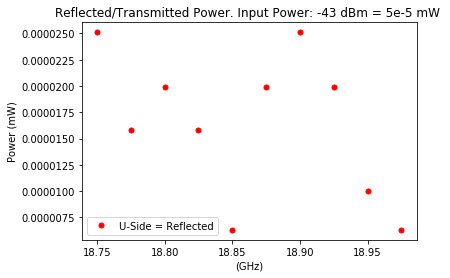

In [23]:
        fig, ax = plt.subplots(1)
#         ax.plot(Freq,Power_mW_U, 'bo', markersize=5, label = "U-Side = Reflected") # Plotting in MHz
#         ax.plot(Freq,Power_mW_I, 'go', markersize=5, label = "I-Side = Transmitted") # Plotting in MHz18.95
        ax.plot(Freq_narrow,Power_mW_U_narrow, 'ro', markersize=5, label = "U-Side = Reflected")
        ax.set_ylabel('Power (mW)')
        ax.set_xlabel('(GHz)')
        ax.set_title('Reflected/Transmitted Power. Input Power: -43 dBm = 5e-5 mW ')
        ax.legend()
        plt.show()

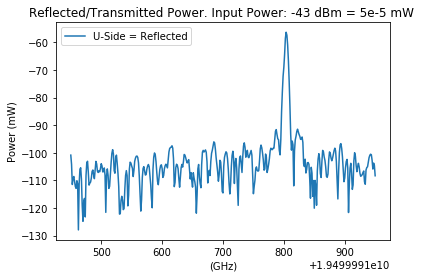

In [37]:
# Uploading the .csv

import pandas as pd
T1A = pd.read_csv('T1A.csv')
T1A_P = T1A['Power']
T1A_F = T1A["Freq"]

fig, ax = plt.subplots(1)
ax.plot(T1A_F,T1A_P, label = "U-Side = Reflected")
ax.set_ylabel('Power (mW)')
ax.set_xlabel('(GHz)')
ax.set_title('Reflected/Transmitted Power. Input Power: -43 dBm = 5e-5 mW ')
ax.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'title'

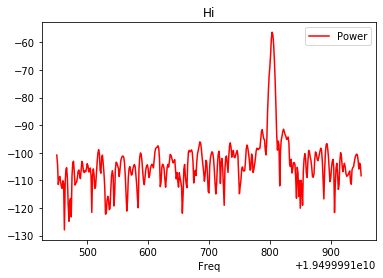

In [5]:
# Uploading the .csv
mpld3.disable_notebook()
# mpld3.enable_notebook()
import pandas as pd
T1A = pd.read_csv('T1A.csv')

T1A.plot(kind='line',x='Freq',y='Power',color='red', title = 'Hi')

plt.show()

## 7/23/20

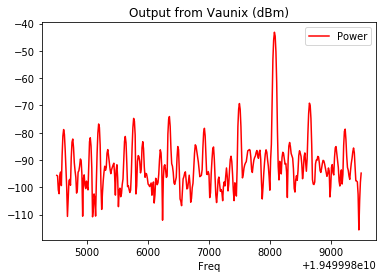

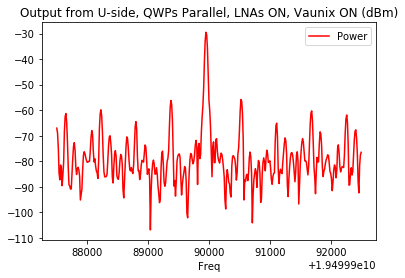

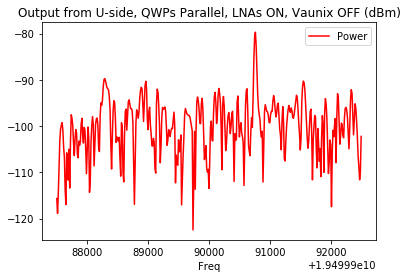

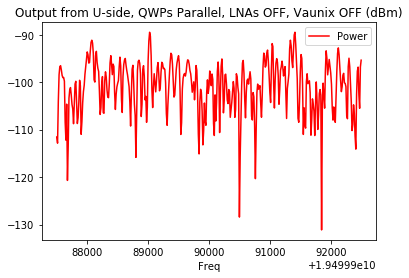

In [5]:

mpld3.disable_notebook()
import pandas as pd

RawSignal = pd.read_csv('RAWSIGNAL.csv')
PDU11 = pd.read_csv('PDU.csv')
PDU10 = pd.read_csv('PDURFOFF.csv')
PDU00 = pd.read_csv('PDURFOFFAMPOFF.csv')


RawSignal.plot(kind='line',x='Freq',y='Power',color='red', title = 'Output from Vaunix (dBm)')
PDU11.plot(kind='line',x='Freq',y='Power',color='red', title = 'Output from U-side, QWPs Parallel, LNAs ON, Vaunix ON (dBm)')
PDU10.plot(kind='line',x='Freq',y='Power',color='red', title = 'Output from U-side, QWPs Parallel, LNAs ON, Vaunix OFF (dBm)')
PDU00.plot(kind='line',x='Freq',y='Power',color='red', title = 'Output from U-side, QWPs Parallel, LNAs OFF, Vaunix OFF (dBm)')
plt.show()

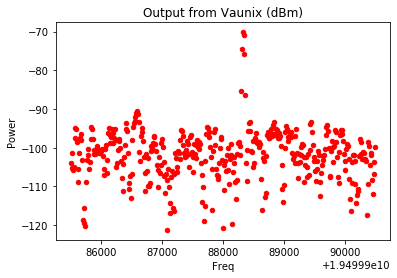

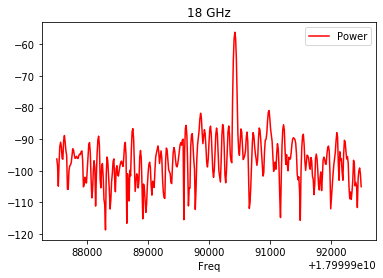

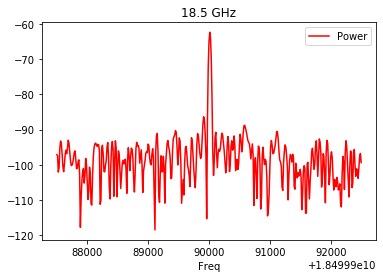

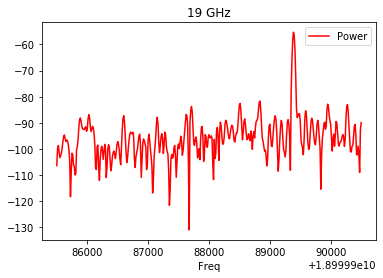

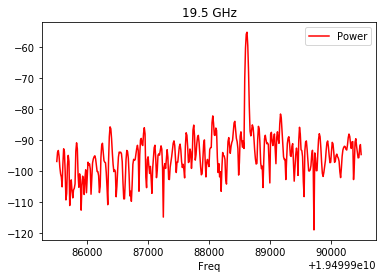

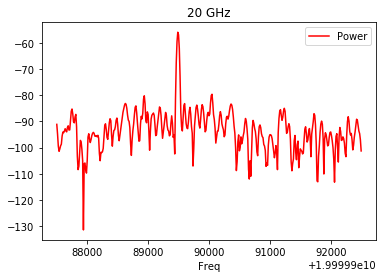

In [6]:
# More Tests

# Setup: QWPs Paralell, U-side in U-side Out. 
# First, is there a different response to a lower power signal? NO. Same gain. (30 dB discrepancy)
# Second, is there a frequency dependence of the reflected power? A bit, but nothing huge. 

Raw2 = pd.read_csv('RAW2.csv')
PDU2_18 = pd.read_csv('PDU2-18.csv')
PDU2_185 = pd.read_csv('PDU2-18.5.csv')
PDU2_19 = pd.read_csv('PDU2-19.csv')
PDU2_195 = pd.read_csv('PDU2.csv')
PDU2_20 = pd.read_csv('PDU2-20.csv')

Raw2.plot(kind='scatter',x='Freq',y='Power',color='red', title = 'Output from Vaunix (dBm)')
PDU2_18.plot(kind='line',x='Freq',y='Power',color='red', title = '18 GHz')
PDU2_185.plot(kind='line',x='Freq',y='Power',color='red', title = '18.5 GHz')
PDU2_19.plot(kind='line',x='Freq',y='Power',color='red', title = '19 GHz')
PDU2_195.plot(kind='line',x='Freq',y='Power',color='red', title = '19.5 GHz')
PDU2_20.plot(kind='line',x='Freq',y='Power',color='red', title = '20 GHz')
plt.show()

In [10]:
300*1.6*10**-19/40

1.2e-18

## For Monday Morning: 

* Go through the 18875,... files and relabel and delete stuff. Already did for P1 series. 
* Make a little script that goes through and opens the 18875 files, extracts the highest power and then makes an array. Plot that.
* Make a plot of the P series as well. 
* Have this labeled and everything for the Monday check-in. 
* Maybe try to write a script that will do the deleting for you. It could convert to np and then delete all things without 4 items in a row or something? 

# Looking at the reflected power as a function of frequency. 

In [59]:
Freq = np.arange(18875,19150,25)
MaxPower_dBm = np.array([])

for i in Freq:
    i = pd.read_csv('{}.csv'.format(i))
    MaxPower_dBm = np.append(MaxPower_dBm,i['Power'].max())

    
MaxPower_mW = 10**(MaxPower_dBm/10)

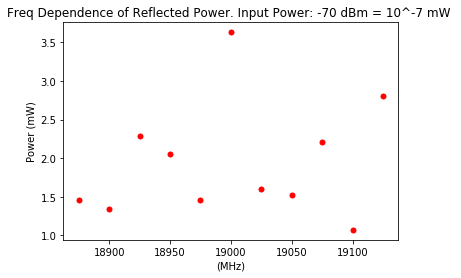

In [61]:
mpld3.disable_notebook()

fig, ax = plt.subplots(1)
ax.plot(Freq, MaxPower_mW*10**6, 'ro', markersize=5)
ax.set_ylabel('Power (mW)')
ax.set_xlabel('(MHz)')
ax.set_title('Freq Dependence of Reflected Power. Input Power: -70 dBm = 10^-7 mW ')

plt.show()

In [41]:
GainAverage_dB = np.mean(MaxPower_dBm) - (-70) 
print('Mean Gain:',GainAverage_dB, 'dB')

Mean Gain: 12.631184317848899 dB


# Shorting the WG in different Positions/Locations: 

In [63]:
Position = np.arange(1,5,1)
MaxPower_dBm = np.array([])

for i in Position:
    i = pd.read_csv('P{}.csv'.format(i))
    MaxPower_dBm = np.append(MaxPower_dBm,i['Power'].max())

    
MaxPower_mW = 10**(MaxPower_dBm/10)

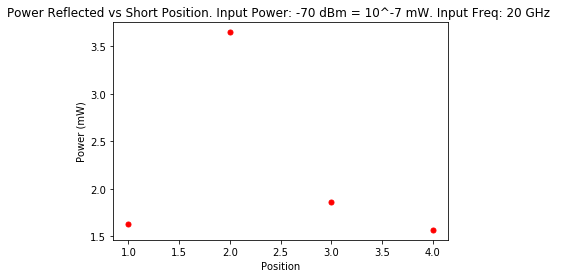

[1.62949314e-06 3.64567119e-06 1.85868853e-06 1.56913119e-06] 1.6787995943127323e-06


In [71]:
P4B = pd.read_csv('P4B.csv')
P4B_mW = 10**(P4B['Power'].max()/10)
fig, ax = plt.subplots(1)
ax.plot(Position, MaxPower_mW*10**6, 'ro', markersize=5)
ax.set_ylabel('Power (mW)')
ax.set_xlabel('Position')
ax.set_title('Power Reflected vs Short Position. Input Power: -70 dBm = 10^-7 mW. Input Freq: 20 GHz ')

plt.show()
print(MaxPower_mW, P4B_mW)

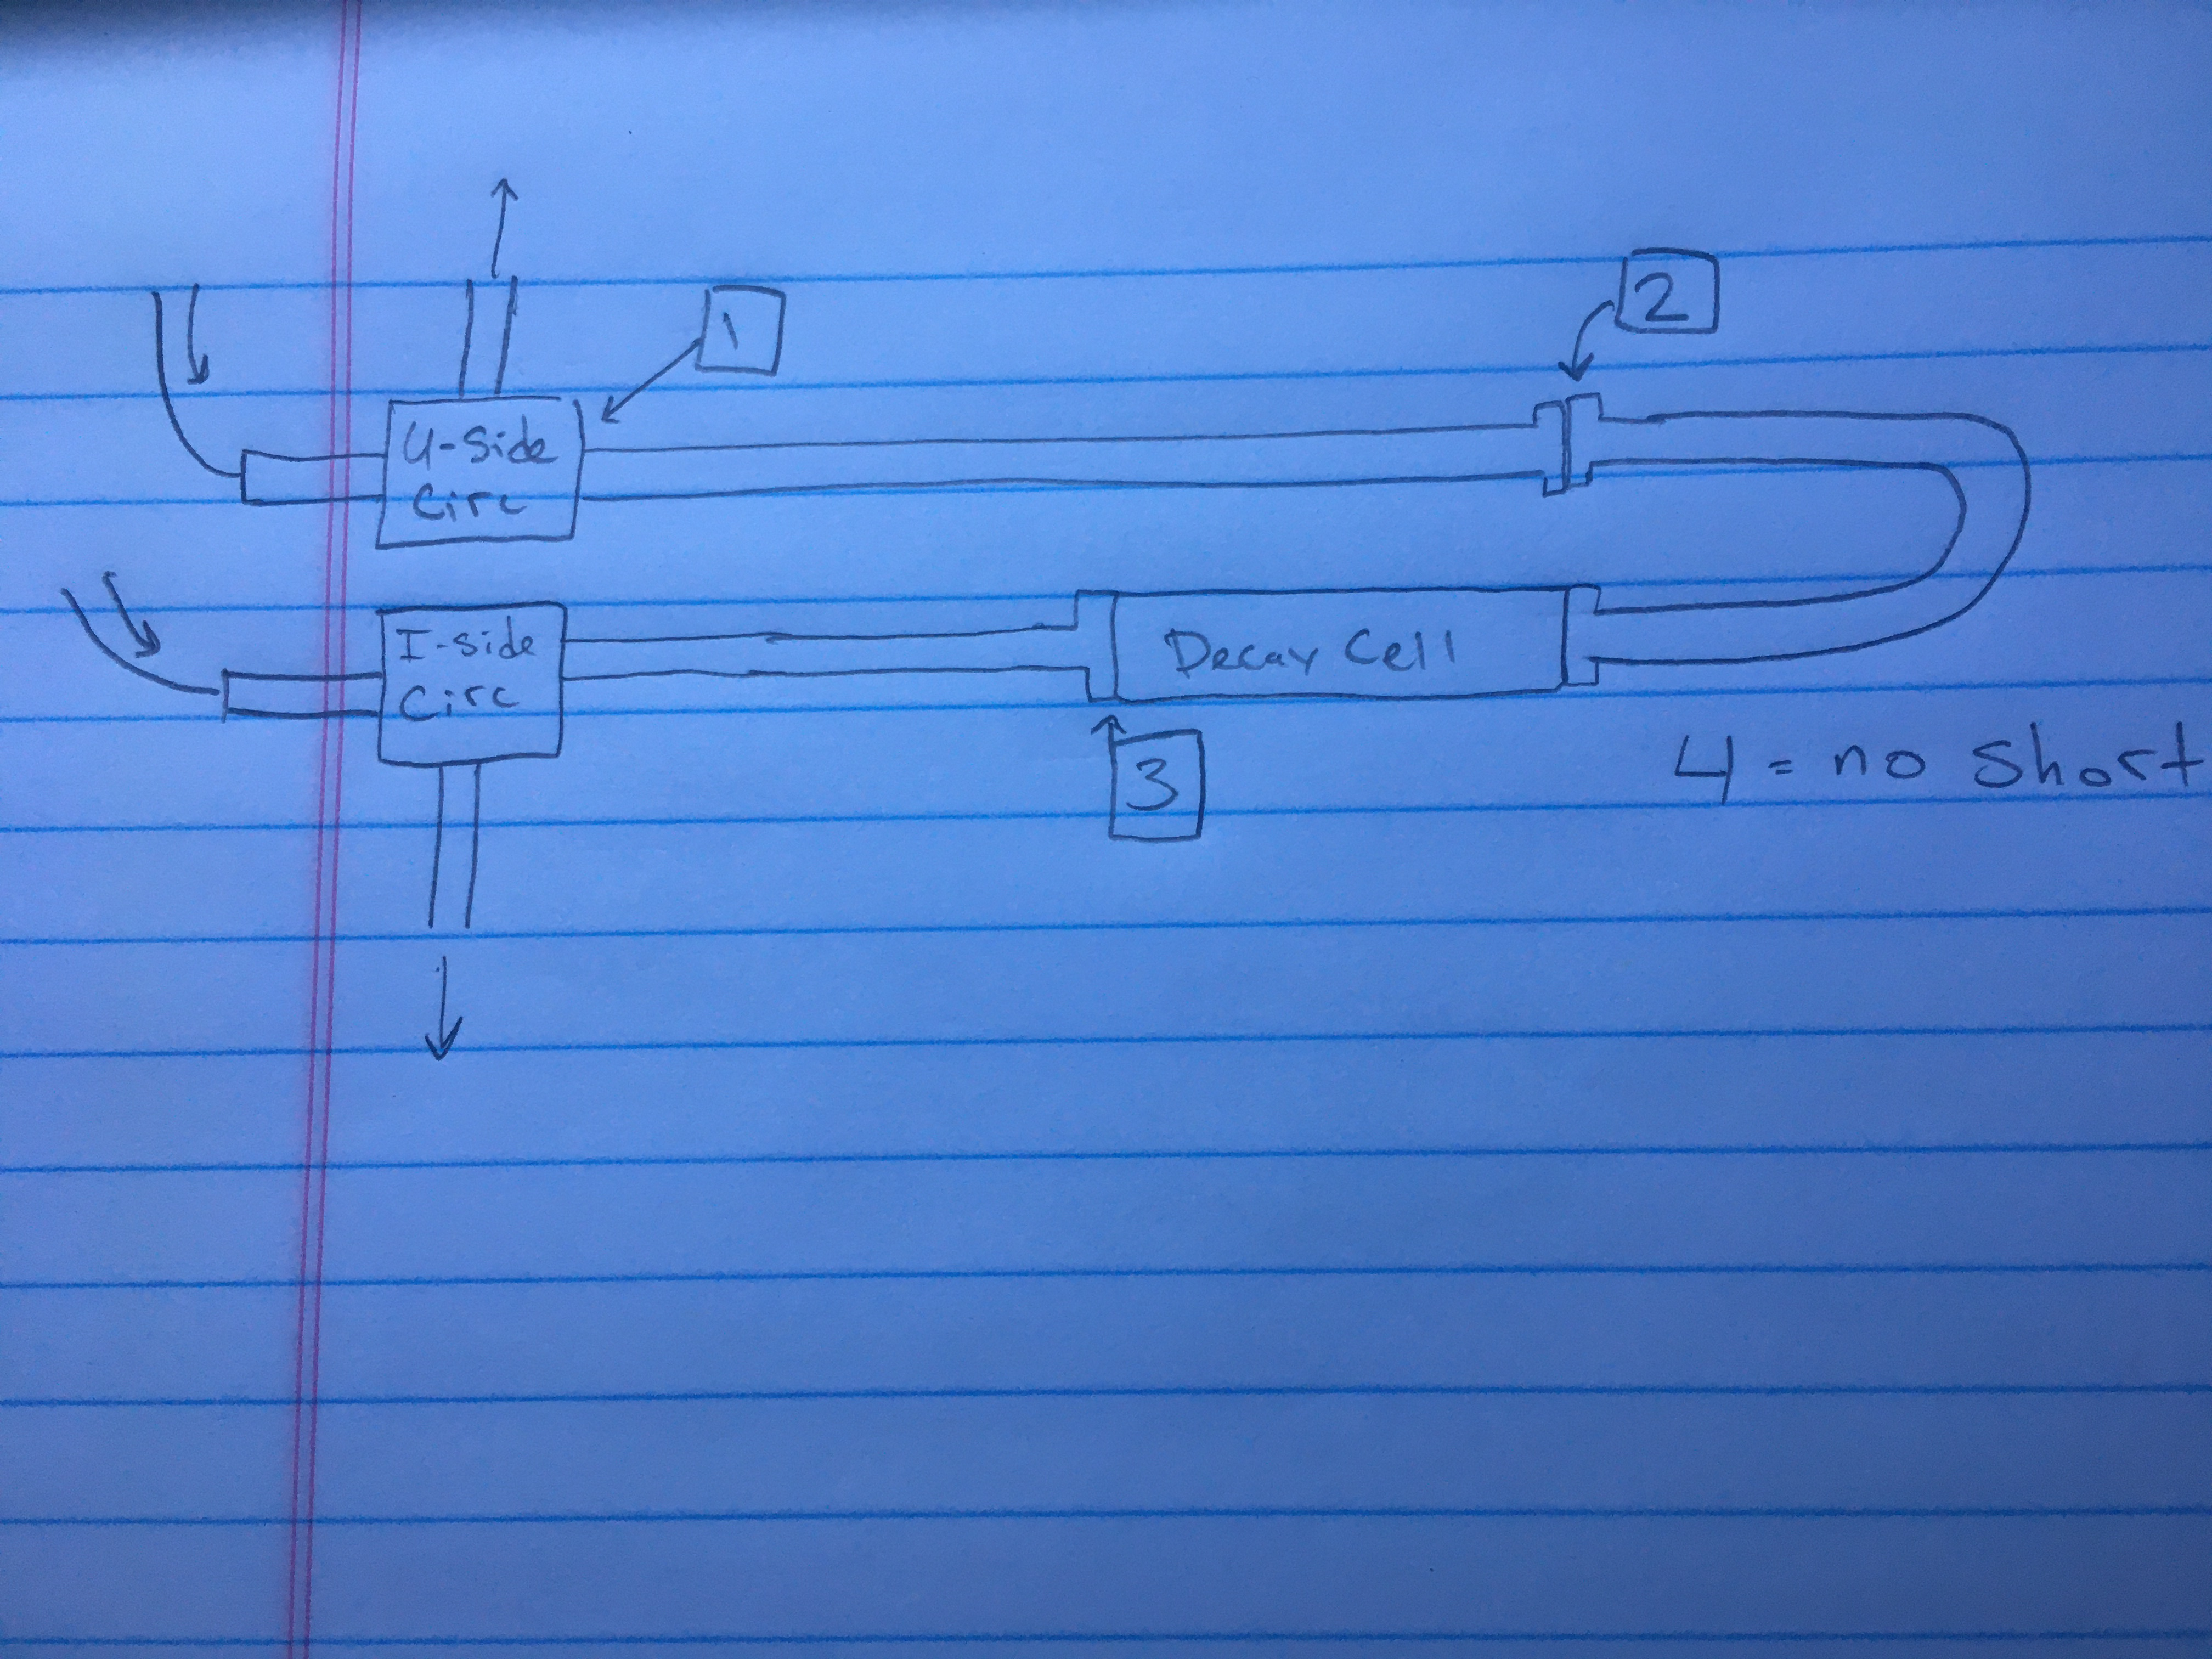

In [14]:
from IPython.display import Image
Image(filename='ShortPositions.JPG', width = 600, height = 300) 

# Looking at old measurements taken for Y-Factor measurements. 

What do these tell us? 

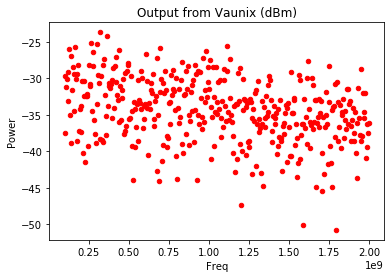

In [46]:
OldTest_41K = pd.read_csv('OldTest_41K.csv')

OldTest_41K.plot(kind='scatter',x='Freq',y='Power',color='red', title = 'Output from Vaunix (dBm)')

In [48]:
MeanPower_OldTest = OldTest_41K['Power'].mean()
MeanPower

-34.36061013725797

In [57]:
%%latex
$$ N = T_e GkB $$ 

<IPython.core.display.Latex object>

# A tale of two LNAs: 

## Do the two functioning LNAs behave as expected? Week of 7/27/20

## Looking at the S-Matrix for the entire RF system: 

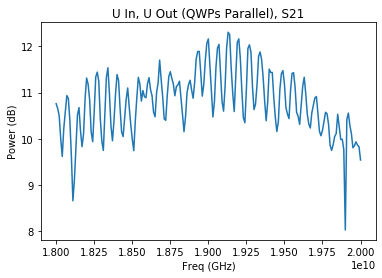

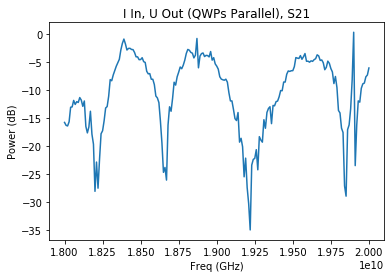

In [24]:
### import matplotlib.pyplot as plt
import numpy as np
import pylab
import skrf as rf
import math 

mpld3.disable_notebook()

# Note: These measurements were done before we upped the V_ds/I_ds on the LNAs. The gain for both in series was ~33 dB (see below).
UInUout = rf.Network('UINUOUT.s2p') # Here the configuration was: U side Out, U side input with a 20 dB attenuator at coax to wg adapter. So expected gain is: -20 + 33 = ~13. 
IInUout = rf.Network('IINUOUT.s2p') # Here the configuration was: U side Out, I side input with a 20 dB attenuator at coax to wg adapter. So expected gain is: -20 + 33 = ~13. 

UInUout_s21 = UInUout.s_db[:,1,0] # The S21 in the fieldfox is the gain according to keysight. No need for factor of 2. 
IInUout_s21 = IInUout.s_db[:,1,0] # The S21 in the fieldfox is the gain according to keysight. No need for factor of 2.

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("U In, U Out (QWPs Parallel), S21")

plt.plot(UInUout.f,UInUout_s21)
plt.show()


plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("I In, U Out (QWPs Parallel), S21")

plt.plot(IInUout.f,IInUout_s21)
plt.show()

## Looking at the Two LNAs together in series: 

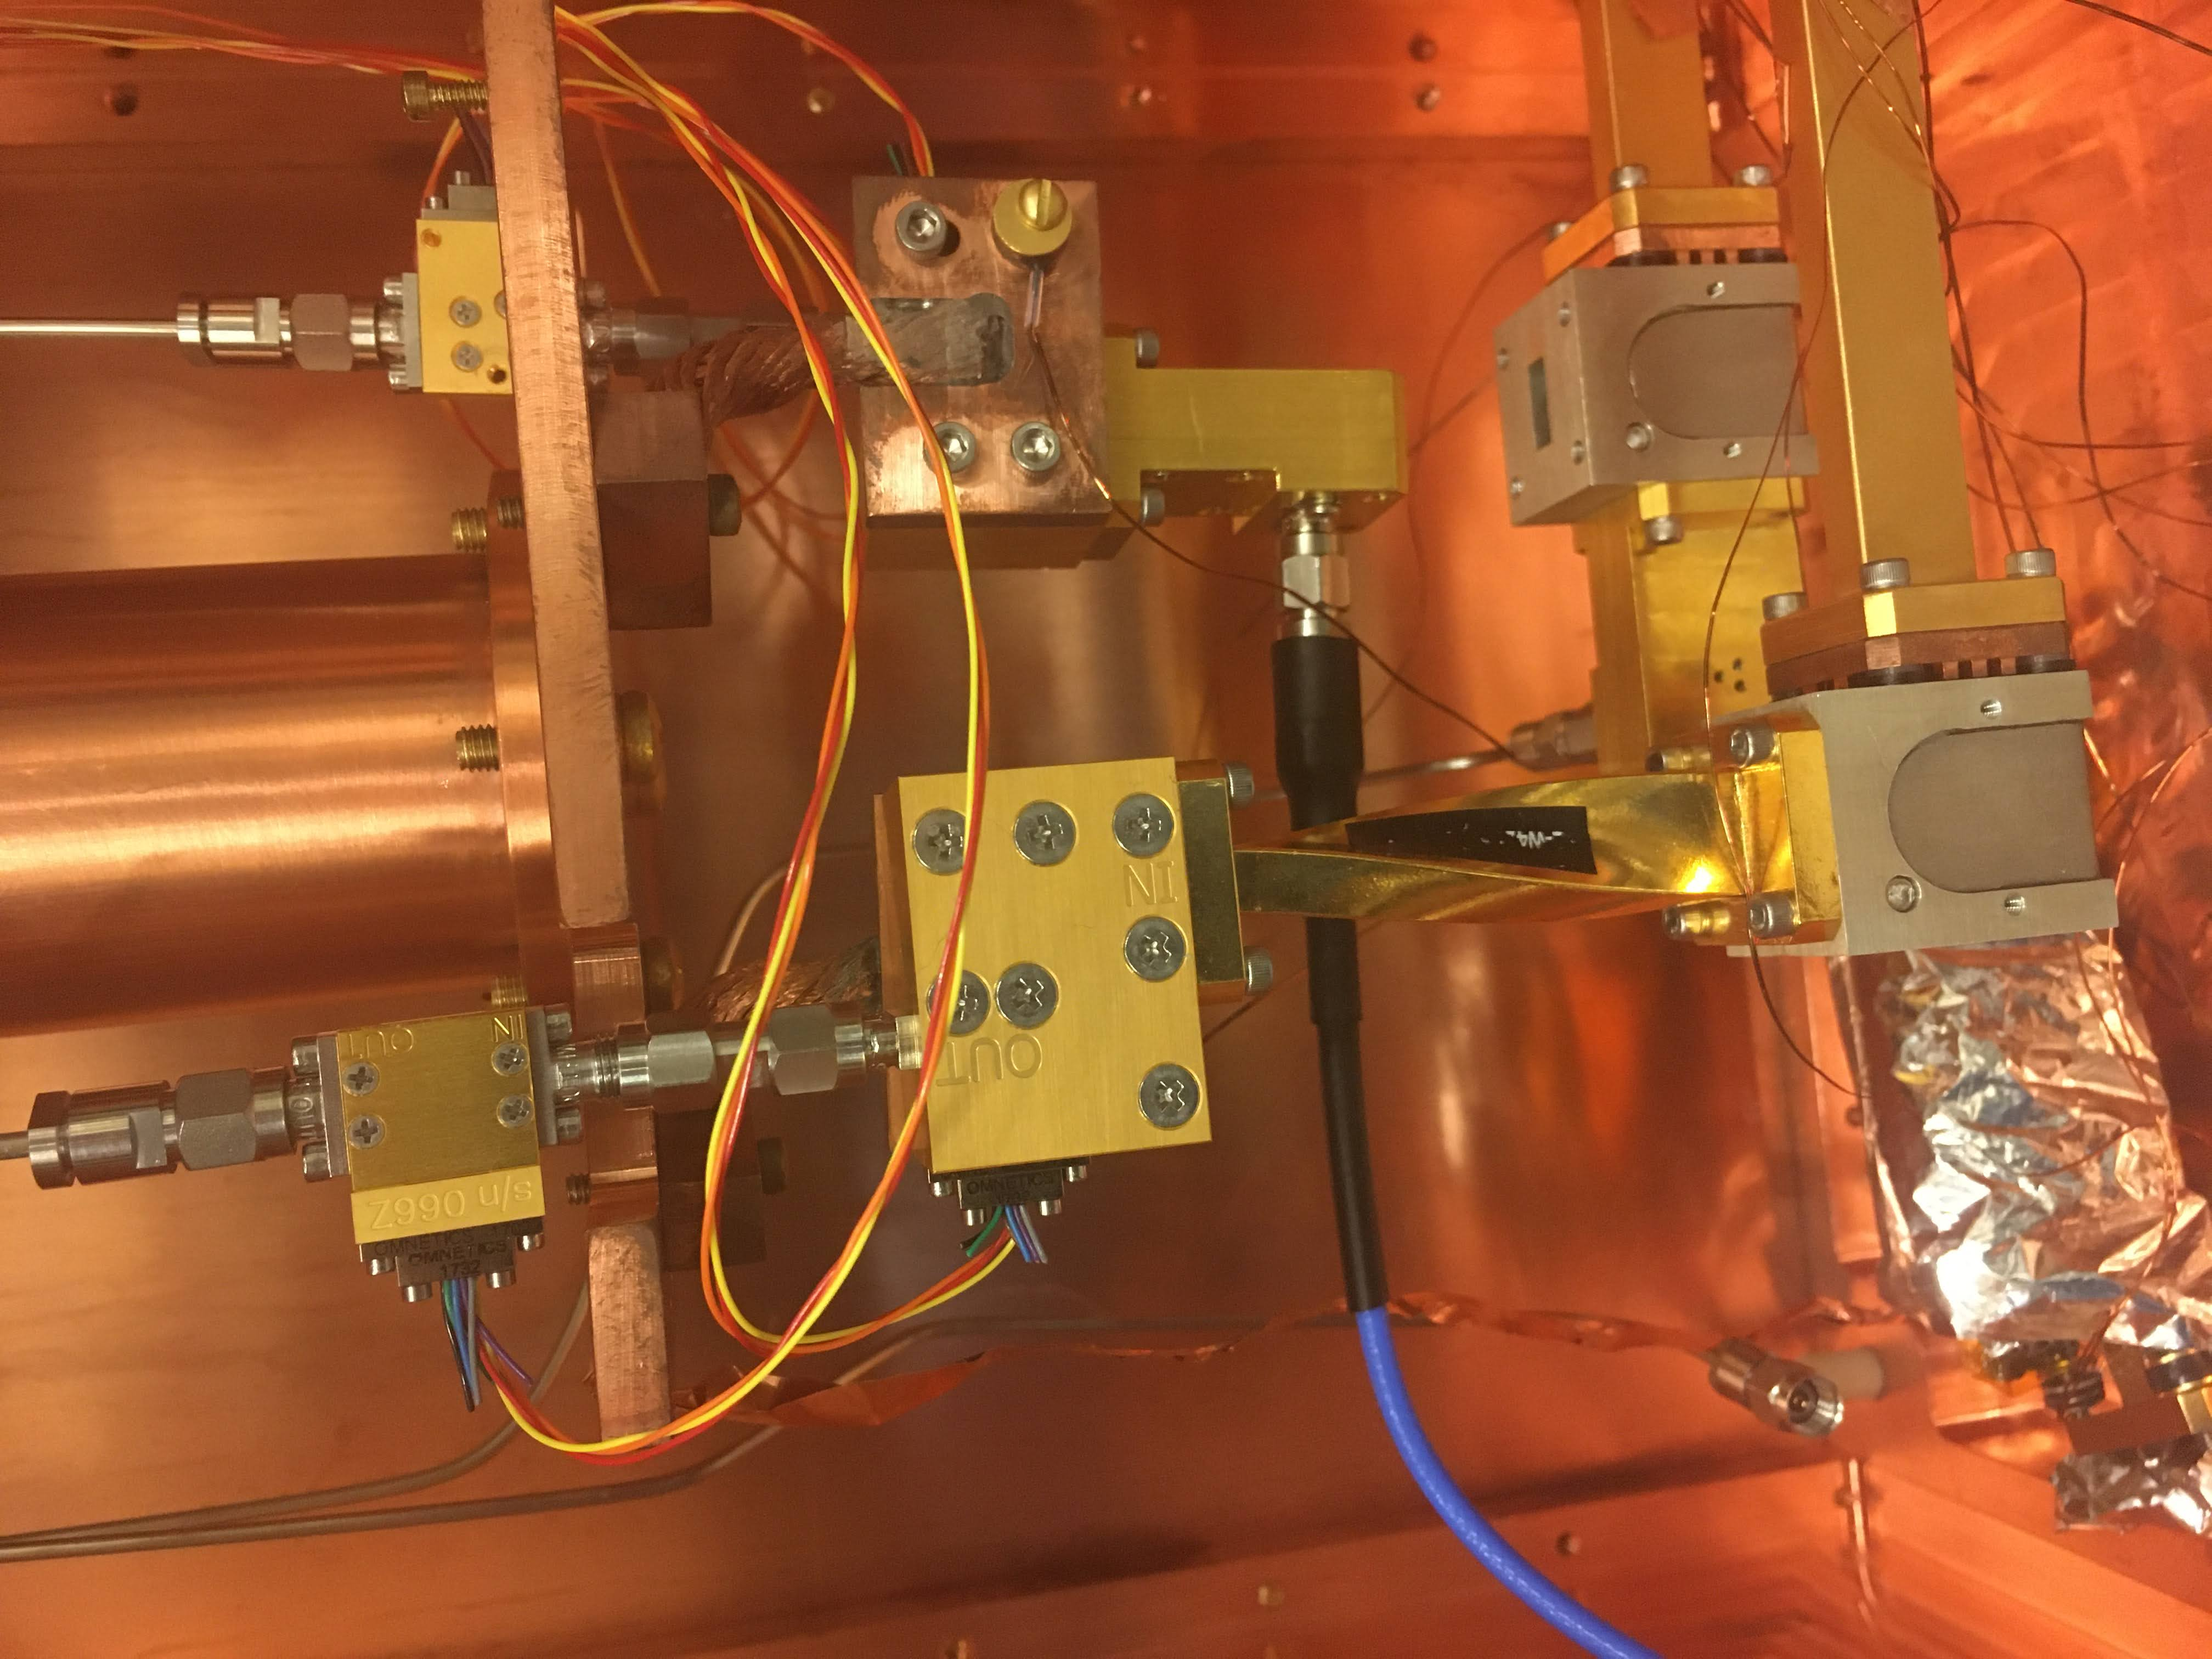

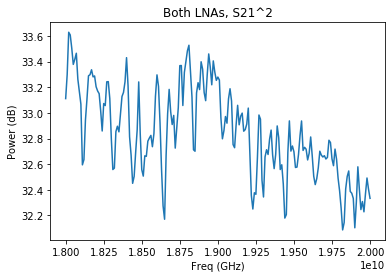

In [20]:
LNAsInSeries = rf.Network('LNAsInSeries.s2p') # Here the configuration was: both LNAs plus the SS cable to the feedthrough. 

LNAsInSeries_s21 = LNAsInSeries.s_db[:,1,0]
LNAsInSeries_s11 = LNAsInSeries.s_db[:,0,0]

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Both LNAs, S21")

plt.plot(LNAsInSeries.f,LNAsInSeries_s21)
# plt.plot(LNAsInSeries.f,LNAsInSeries_s11)

# plt.show()
# plt.figure(1)
# plt.tick_params(axis='both', which='major', labelsize=10)
# plt.xlabel('Freq (GHz)', fontsize = 10)
# plt.ylabel('Power (dB)', fontsize = 10)
# plt.title("Both LNA gain measurement, S21^2")

# plt.plot(LNAsInSeries.f,LNAsInSeries_s11)
# # plt.plot(LNAsInSeries.f,LNAsInSeries_s11)
# plt.show()
from IPython.display import Image
Image(filename='LNAsInSeries.JPG', width = 400, height = 200) 

## The Two LNAs Individually: 

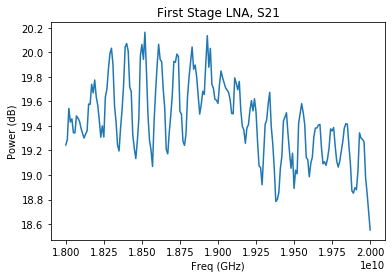

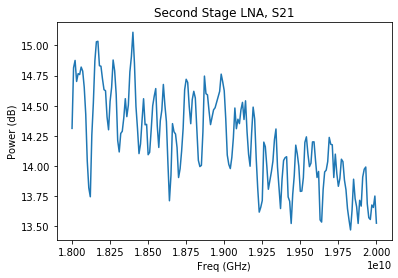

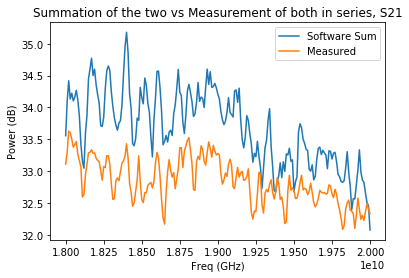

In [23]:
LNA1 = rf.Network('LAN1.s2p') # Here the configuration was: U side Out, U side input with a 20 dB attenuator at coax to wg adapter. So expected gain is: -20 + 64 = ~44. 
LNA2 = rf.Network('LAN2.s2p') # Here the configuration was: U side Out, I side input with a 20 dB attenuator at coax to wg adapter. So expected gain is: -20 + 64 = ~44. 

LNA1_s21 = LNA1.s_db[:,1,0] 
LNA2_s21 = LNA2.s_db[:,1,0]

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("First Stage LNA, S21")

plt.plot(LNA1.f,LNA1_s21)
plt.show()


plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Second Stage LNA, S21")

plt.plot(LNA2.f,LNA2_s21)
plt.show()

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Summation of the two vs Measurement of both in series, S21")

plt.plot(LNA2.f,LNA2_s21 + LNA1_s21, label = 'Software Sum')
plt.plot(LNA2.f,LNAsInSeries_s21, label = 'Measured')
plt.legend()
plt.show()

## Add a legend in here! 

## Is this consistent with what we see when we inject a signal with the Vaunix? 

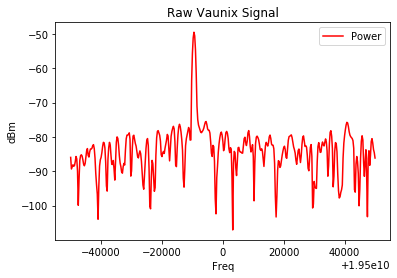

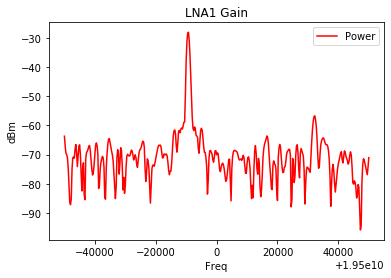

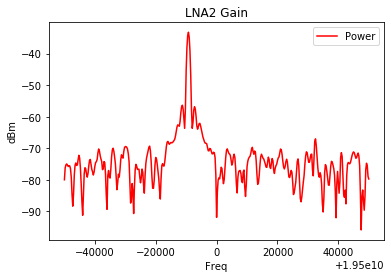

In [7]:
## Now what if you inject the vaunix signal? Is what we see consistent? 
## maybe just taking the highest power point isn't doing it right, maybe try to do the summation and see if that makes any difference, but the peak chage should still 
## scale ... Do this early tomorrow. 
mpld3.disable_notebook()

TOFF = pd.read_csv('VAUN_195G_-50DBM_TOFF_28Jul20201821.csv')
TOLNA1 = pd.read_csv('VAUN_195G_-50DBM_TOLAN1_28Jul2020180.csv')
TOLNA2 = pd.read_csv('VAUN_195G_-50DBM_TOLAN2_28Jul202018.csv')


ax0 = TOFF.plot(kind='line',x='Freq',y='Power',color='red', title = 'Raw Vaunix Signal')
ax0.set( ylabel="dBm")
ax1 = TOLNA1.plot(kind='line',x='Freq',y='Power',color='red', title = 'LNA1 Gain')
ax1.set( ylabel="dBm")
ax2 = TOLNA2.plot(kind='line',x='Freq',y='Power',color='red', title = 'LNA2 Gain')
ax2.set( ylabel="dBm")

plt.show()

In [8]:
## Quantitatively: 

TOFF_MaxPower = TOFF['Power'].max()
TOLNA1_MaxPower = TOLNA1['Power'].max()
TOLNA2_MaxPower = TOLNA2['Power'].max()

TOLNA1_Gain = TOLNA1_MaxPower - TOFF_MaxPower
TOLNA2_Gain = TOLNA2_MaxPower - TOFF_MaxPower

print('LNA1 Gain:', TOLNA1_Gain, 'dB')
print('LNA2 Gain:', TOLNA2_Gain, 'dB')

LNA1 Gain: 21.391651153564503 dB
LNA2 Gain: 16.314468383789105 dB


* This makes me question the factor of two in the S21 interpretation...
* Going to look at the integrated signal. Perhaps there is a smearing with the gain that is making it so that just taking the max power bin and comparing them isn't working. Investigating this now.. 
* Below we sum over all the bins in the peak (according to some requirement, greater than 2 stds above the mean for now (see if varying that changes anything)) to see if this has any effect on the gain measurements. 

In [26]:
## Here we integrate/sum over all the bins in the peak. Being sure to do the sum in units of mW! 

var = .5
TOFF_MaxPower_mW = 0
bins=0
for i,v in enumerate(TOFF['Power']):
    if v > TOFF['Power'].mean()+ var*TOFF['Power'].std():
        TOFF_MaxPower_mW += 10**(TOFF['Power'][i]/10)
        bins+=1
print('bins above threshold TOFF',bins)     

bins=0
TOLNA1_MaxPower_mW = 0
for i,v in enumerate(TOLNA1['Power']):
    if v > TOLNA1['Power'].mean()+ var*TOLNA1['Power'].std():
        TOLNA1_MaxPower_mW += 10**(TOLNA1['Power'][i]/10)      
        bins+=1
print('bins above threshold LNA1',bins) 

bins=0
TOLNA2_MaxPower_mW = 0
for i,v in enumerate(TOLNA2['Power']):
    if v > TOLNA2['Power'].mean()+ var*TOLNA2['Power'].std():
        TOLNA2_MaxPower_mW += 10**(TOLNA2['Power'][i]/10) 
        bins+=1
print('bins above threshold LNA1',bins)         


print('gain LNA1:', 10*np.log10(TOLNA1_MaxPower_mW) - 10*np.log10(TOFF_MaxPower_mW) )
print('gain LNA2:', 10*np.log10(TOLNA2_MaxPower_mW) - 10*np.log10(TOFF_MaxPower_mW) )



bins above threshold 106
bins above threshold 84
bins above threshold 75
gain LNA1: 21.406493307394125
gain LNA2: 16.270767922336653


## Testing to see if the gain responds to increasing I_ds , V_ds on LNAs

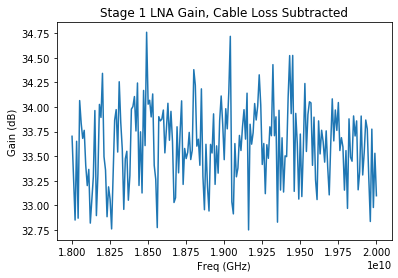

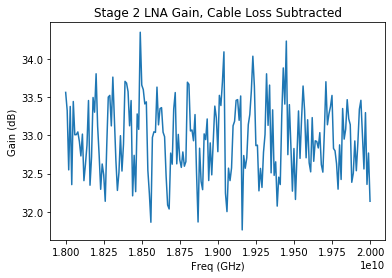

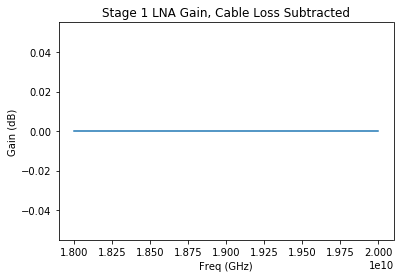

In [12]:
### import matplotlib.pyplot as plt
import numpy as np
import pylab
import skrf as rf
import math 

mpld3.disable_notebook()

LNA1 = rf.Network('A.s2p') # Configuration: Just the 1st stage LNA with a WR42 to coax adapter. 
LNA2 = rf.Network('B.s2p') # Configuration: Just the 2nd stage LNA. 
CableLoss = rf.Network('0.s2p') # Configuration: Just the two cables used above connected together with a double-sided male sma coax adapter.  

LNA1_s21 = LNA1.s_db[:,1,0]  
LNA2_s21 = LNA2.s_db[:,1,0]
CableLoss_s21 = CableLoss.s_db[:,1,0]

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Gain (dB)', fontsize = 10)
plt.title("Stage 1 LNA Gain, Cable Loss Subtracted")

plt.plot(LNA1.f, LNA1_s21 - CableLoss_s21)
plt.show()


plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Gain (dB)', fontsize = 10)
plt.title("Stage 2 LNA Gain, Cable Loss Subtracted")

plt.plot(LNA2.f,LNA2_s21- CableLoss_s21)
plt.show()


LNA1_s11 = LNA1.s_db[:,0,0]  

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Gain (dB)', fontsize = 10)
plt.title("Stage 1 LNA Gain, Cable Loss Subtracted")

plt.plot(LNA1.f,LNA1_s11 )
plt.show()

* I_ds = 25 mA, V_ds = 1.2 V for both of the above measurements. 
* The "cold" settings are: I_ds = 8 mA V_ds = .5 V
* Perhaps there is still gain to be milked by tuning the I_ds and V_ds. We should experiment with this when cold to maximize gain. Doesn't matter much for us warm.

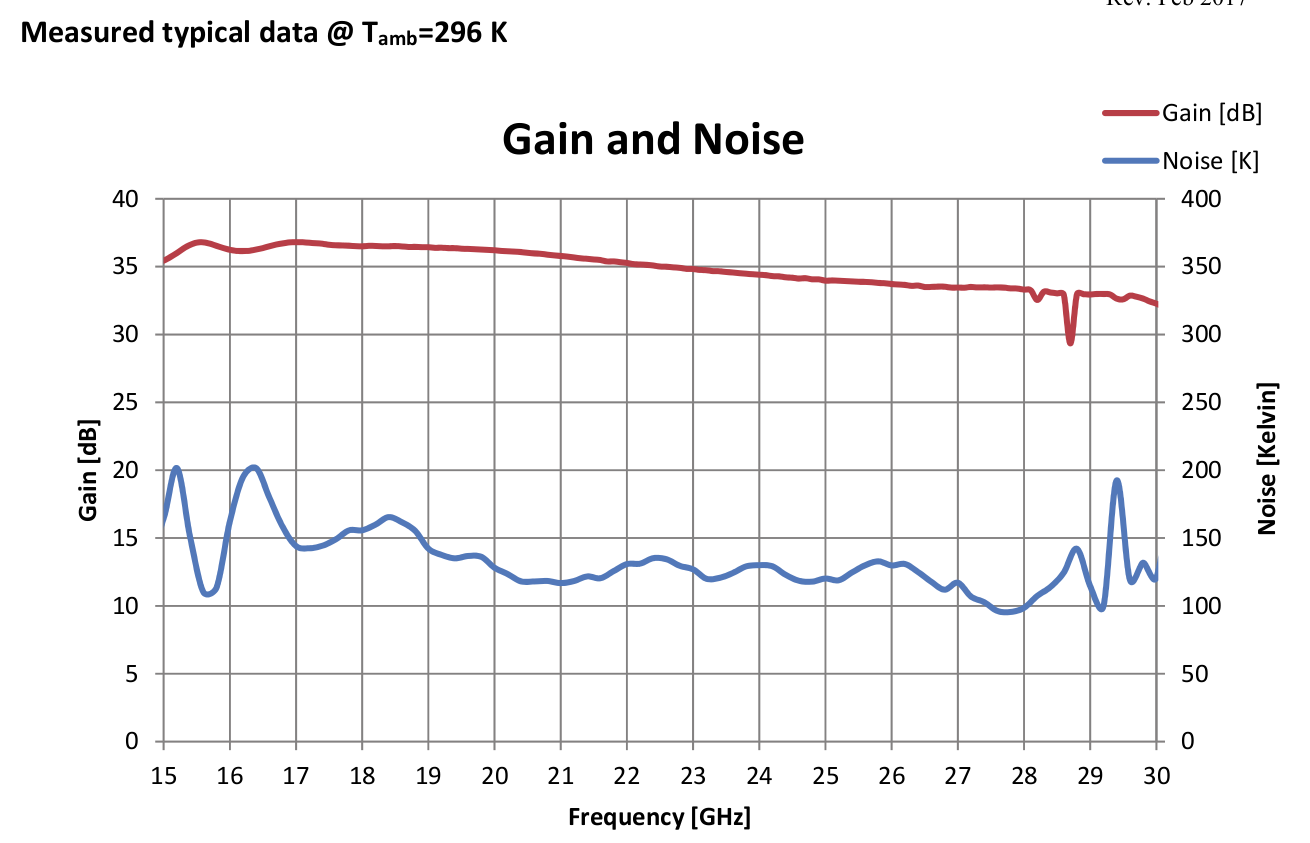

In [7]:
from IPython.display import Image
Image(filename='LNA1_Gain.png', width = 400, height = 200) 

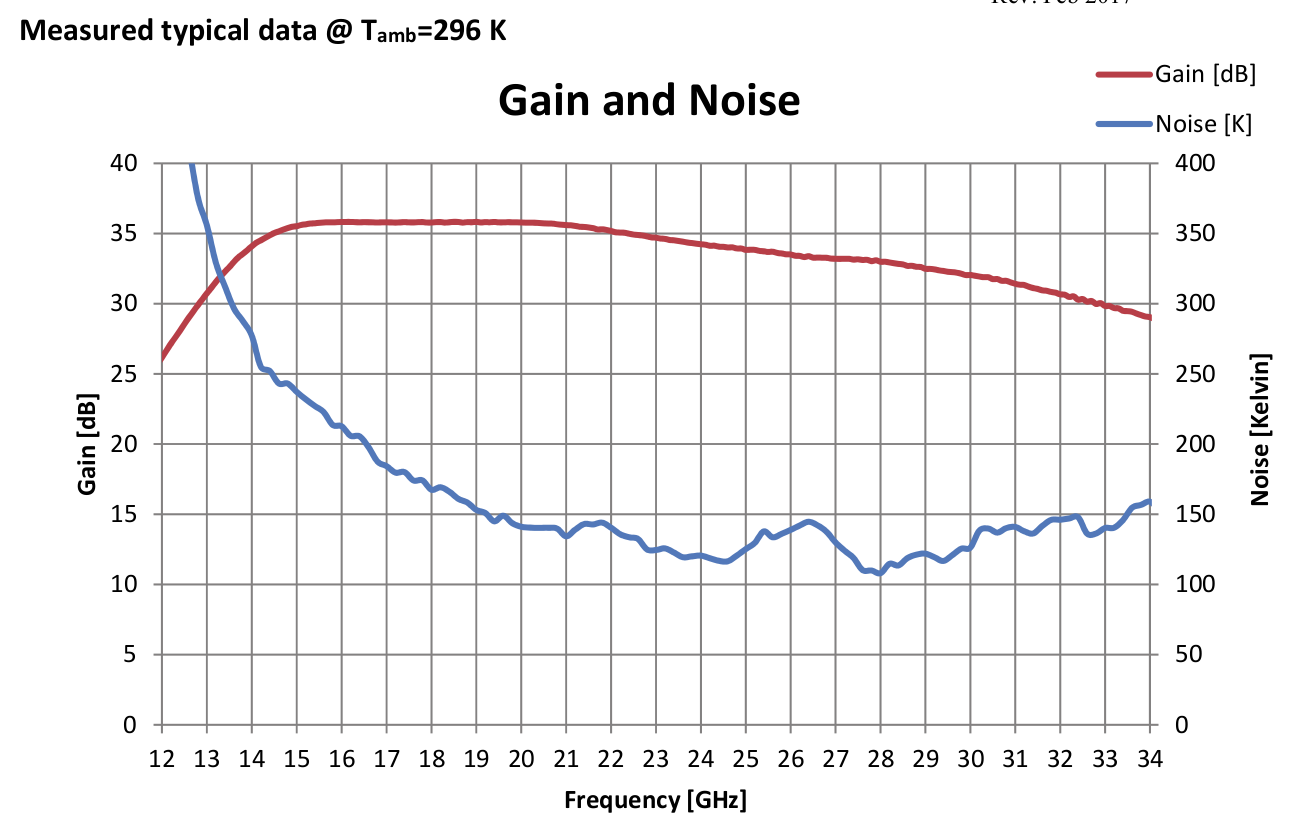

In [8]:
Image(filename='LNA2_Gain.png', width = 400, height = 200) 

# Summarizing RF Tests Done So Far 8/17/20

With LNAs (62 dB of gain)   
(Tests done by Heather)

|  |QWP Parallel| QWP Perpendicular|
|--- | --- | ---|
| U in U out     | 20 dB | 20 dB |
| I in U out     | 31 dB      |   51 dB |


Without LNAs ( 0 dB of gain)   
(Tests done by Heather) 

|  |QWP Parallel| QWP Perpendicular|
|--- | --- | ---|
| U in U out     | -30 dB |  |
| I in U out     | -25 dB      |   -7 dB |
| I in I out     | -7 dB      |    |

With LNAs ( 33 dB of gain, before increasing I_ds, V_ds )    
(Tests done by Drew) 

|  |QWP Parallel| QWP Perpendicular|
|--- | --- | ---|
| U in U out     | 31 dB |  |
| I in U out     | 5 dB      |   |

# Comparing Tests: 
    
|  |QWP Parallel| QWP Perpendicular|
|--- | --- | ---|
| U in U out     | 20 dB, 32 dB, 60 dB | - |
| I in U out     | 31 dB, 37 dB, 34 dB     |   51 dB, 55 dB |


Format: w/ LNAs (gain 62 dB), w/o LNAs + 62 dB, w/ LNAs (gain 33 dB) + 29 dB
    
    
Notes: 

* P1dB of 2nd stage LNA is -12 dB. -45 dB - 40 dB  + 60 dB = -35 dB. Shouldn't be an issue. 

# Continuing testing. 9/11/20.

* Testing new LNAs. 
* Getting at our SNR and Gain.
* Working on plots for Monday Meeting. 

S-Parameters (S21)

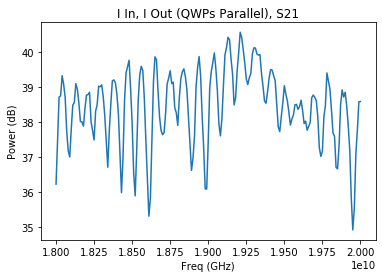

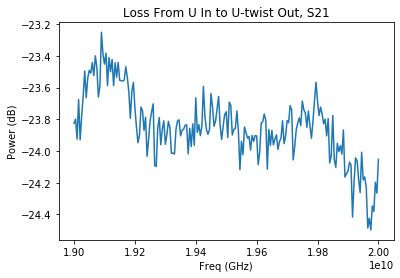

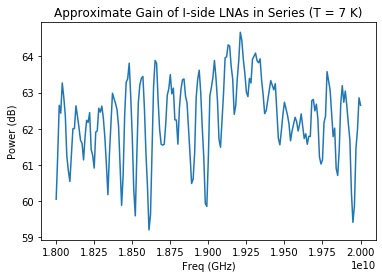

In [29]:
### import matplotlib.pyplot as plt
import numpy as np
import pylab
import skrf as rf
import math 

mpld3.disable_notebook()

# Describe the measurements. Document!
IInIout_Full = rf.Network('Tests_11092020/S21_IIN_IOUT_FULLASSEM_11.Sep.2020.12.59.s2p')  
Cal = rf.Network('Tests_11092020/S21_CAL_11.Sep.2020.12.36.s2p')

UInUTwistOut = rf.Network('Tests_11092020/S21_UINUTWOUT03.Sep.2020.18.58.s2p')

IInIout_Full_s21 = IInIout_Full.s_db[:,1,0] 
Cal_s21 = Cal.s_db[:,1,0] 

UInUTwistOut_s21 = Cal.s_db[:,1,0] 

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("I In, I Out (QWPs Parallel), S21")

plt.plot(IInIout_Full.f,IInIout_Full_s21-Cal_s21)
plt.show()

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Loss From U In to U-twist Out, S21")
# Note that there is essentially no assymmetry so this is fine. But need to verify. 

plt.plot(UInUTwistOut.f,UInUTwistOut_s21)
plt.show()

plt.figure(1)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('Freq (GHz)', fontsize = 10)
plt.ylabel('Power (dB)', fontsize = 10)
plt.title("Approximate Gain of I-side LNAs in Series (T = 7 K)")

plt.plot(IInIout_Full.f,IInIout_Full_s21-Cal_s21-UInUTwistOut_s21)
plt.show()

Interpreting the SA signals taken with Vaunix input. 
Also thinking about how much noise power will actually be in each bin for us. 


First thinking about the noise power: 

* Our bin width is 170.9 kHz. 
* From an old test with the term @ 13K: (need to redo with current setup):
    * NO. The gain was so much different. Can't use this, 

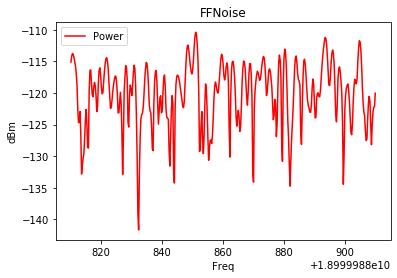

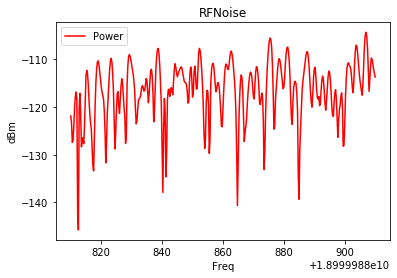

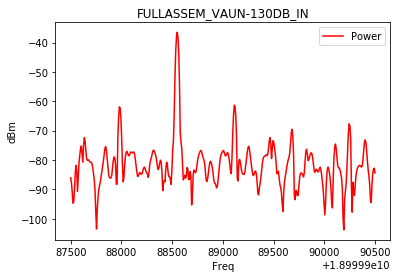

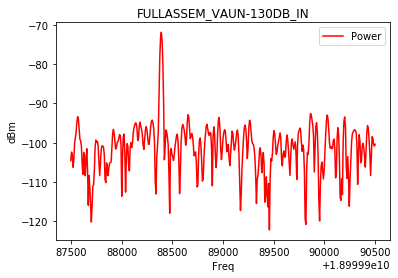

In [24]:
# Now what if you inject the vaunix signal? Is what we see consistent? 

mpld3.disable_notebook()

FFNoise = pd.read_csv('Tests_11092020/SPEC_FFNOISE_11.Sep.2020.14.20.csv')
RFNoise = pd.read_csv('Tests_11092020/SPEC_FULLASSEM_NOIN_11.Sep.2020.14.20.csv')
RFNoise_VaunixOn = pd.read_csv('Tests_11092020/SPEC_FULLASSEM_NOINPUT_VAUNON_11.Sep.202.csv')
RFFull_2 = pd.read_csv('Tests_11092020/SPEC_FULLASSEM_VAUN-110DB_IN_11.Sep.2020.csv')
RFFull_3 = pd.read_csv('Tests_11092020/SPEC_FULLASSEM_VAUN-130DB_IN_11.Sep.2020.csv')
RFFull_1 = pd.read_csv('Tests_11092020/SPEC_FULLASSEM_VAUN-90DB_IN_11.Sep.2020.csv')
RFFull_3_Zoom = pd.read_csv('Tests_11092020/SPEC_VAU-130DB_FULLESSEM_ZOOM_11.Sep.202.csv')
NOTSURE = pd.read_csv('Tests_11092020/SPEC_VAUN-130DB_11.Sep.2020.14.03.csv')
VaunixInput = pd.read_csv('Tests_11092020/SPEC_VAUNIX40DB_11.Sep.2020.13.30.csv')


ax0 = FFNoise.plot(kind='line',x='Freq',y='Power',color='red', title = 'FFNoise')
ax0.set( ylabel="dBm")
ax1 = RFNoise.plot(kind='line',x='Freq',y='Power',color='red', title = 'RFNoise')
ax1.set( ylabel="dBm")
ax2 = RFFull_1.plot(kind='line',x='Freq',y='Power',color='red', title = 'FULLASSEM_VAUN-130DB_IN')
ax2.set( ylabel="dBm")

ax3 = VaunixInput.plot(kind='line',x='Freq',y='Power',color='red', title = 'VaunixInput')
ax3.set( ylabel="dBm")

plt.show()

In [38]:
# Ok so what does this mean? 
VaunixInput_MaxPower = VaunixInput['Power'].max()
RFFull_1_MaxPower = RFFull_1['Power'].max()
print(VaunixInput_MaxPower)
print(RFFull_1_MaxPower)
# Basically -23.8 + 1 = -22.8 dB of "gain" from input to decay cell. 

# So the CRES-like signal power is: 
CRESPower = VaunixInput_MaxPower - 22.8 
print('CRES Event Power at decay cell:', CRESPower)
print('CRES Event Power at I-out:', RFFull_1_MaxPower)
print('Approximate Event Gain:',RFFull_1_MaxPower - CRESPower)
print('Approximate Loss from Decay Cell to Amps:', 61 - (RFFull_1_MaxPower - CRESPower))


-71.8566589355469
-36.4912109375
CRES Event Power at decay cell: -94.6566589355469
CRES Event Power at I-out: -36.4912109375
Approximate Event Gain: 58.1654479980469
Approximate Loss from Decay Cell to Amps: 2.8345520019530994


In [ ]:
# Now Approximate Noise Power at I-out to see if the CRES power is enough: 
# -117 dBm/Hz out of Al box. 
# 170 kHz bandwidth. 
# -117dBm = 2*10^-15 W -> 170*2 *10^-15 W= 3.4*10^-13 W = 3.4*10^-10 mW = -94.7 dBm. Seems low AF but ok. 
# So if the event was actually a -120 dBm signal at the decay cell then the I-out power would be: 
# 